In [41]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Loading data, assigning variables, reading data, merging data
mouse_data_path = "data/mouse_drug_data.csv"
trial_data_path = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_data_path)
clinical_data = pd.read_csv(trial_data_path) 

datamerge_data = pd.merge(mouse_data, clinical_data, on="Mouse ID")
data_combined = pd.DataFrame(datamerge_data)

# Show first five rows
datamerge_data.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [42]:
# Data Grouped by Drug and Timepoint 

grouped = datamerge_data.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
means = datamerge_data["Tumor Volume (mm3)"]

# Convert to DataFrame

grouped_df = pd.DataFrame(grouped)
time = grouped_df.iloc[0:10, 1]
tum_mean = grouped_df.pivot(index="Timepoint", columns="Drug", values=["Tumor Volume (mm3)"])

# Preview DataFrame
grouped_df[0:10]

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [43]:

mouse_data.columns

Index(['Mouse ID', 'Drug'], dtype='object')

In [44]:
clinical_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

### For My Reference on SEM



Pandas dataframe.sem() function return unbiased standard error of the mean over requested axis. The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution[1] or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM).

In [45]:
# Standard Error

tum_sem = datamerge_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Create DataFrame

tum_sem_df = pd.DataFrame(tum_sem).reset_index()
tum_sem_df.rename(columns = {"Tumor Volume (mm3)": "SEM"}, inplace=True)
tum_sem_refor = tum_sem_df.pivot(index="Timepoint", columns="Drug", values="SEM")
grouped_df_sem = pd.merge(grouped_df, tum_sem_df, on=["Timepoint", "Drug"])

tum_sem_refor.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [46]:
# Minor Data Munging to Re-Format the Data Frames
# Data Munging =  data munging is the initial process of refining raw data into content
                # or formats better-suited for consumption by downstream systems and users. 
    
tum_avg = grouped_df_sem.pivot(index='Timepoint', columns='Drug', values=['Tumor Volume (mm3)'])
tum_err = grouped_df_sem.pivot(index='Timepoint', columns='Drug', values=['SEM'])

tum_avg.head(10)

# Preview that Reformatting worked

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [47]:

# Create dataframe to store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tum_avg = pd.DataFrame(datamerge_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tum_avg = tum_avg.reset_index()

# Preview DataFrame

tum_avg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [48]:

# Create a dataframe and store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tum_err = pd.DataFrame(datamerge_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem())
tum_err = tum_err.reset_index()

# Preview DataFrame

tum_err.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [49]:

# Minor Data Munging to Re-Format the Data Frames

tum_avg = tum_avg.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
tum_err = tum_err.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')

# Preview that Reformatting worked

display(tum_avg)
display(tum_err)

tum_avg.dtypes

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug
Capomulin    float64
Ceftamin     float64
Infubinol    float64
Ketapril     float64
Naftisol     float64
Placebo      float64
Propriva     float64
Ramicane     float64
Stelasyn     float64
Zoniferol    float64
dtype: object

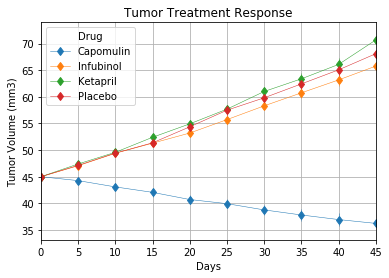

In [50]:
# Generate the Plot and create DataFrames First

tum_study_mean_df = tum_avg[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tum_study_error_df = tum_err[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

tum_study_mean_df.plot(kind="line", use_index=True, grid=True, yerr=tum_study_error_df, marker="d",
                      linewidth=0.5)

plt.title("Tumor Treatment Response")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("TumorPlots.png")

# Show the Figure
plt.show()

In [51]:

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_mean_df = pd.DataFrame(data_combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
met_mean_df = met_mean_df.reset_index()

# Preview DataFrame
met_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [52]:

# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error_df = pd.DataFrame(data_combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem())
met_error_df = met_error_df.reset_index()

# Preview DataFrame
met_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [53]:

# Minor Data Munging to Re-Format the Data Frames
met_mean_df = met_mean_df.pivot(values='Metastatic Sites', index='Timepoint', columns='Drug')
met_error_df = met_error_df.pivot(values='Metastatic Sites', index='Timepoint', columns='Drug')

# Preview that Reformatting worked
display(meta_mean_df)
display(meta_error_df)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791
